<a href="https://colab.research.google.com/github/Sugan2002/Object-Detection-using-tensorflow/blob/main/Obj_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from google.colab import drive
# to share the GPU resources for multiple sessions
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

%matplotlib inline

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_data_dir = '/content/drive/MyDrive/Datasets/obj_images'

In [ ]:
os.listdir(my_data_dir)

['test', 'train']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(train_path)

['with_obj', 'without_obj']

In [ ]:
len(os.listdir(train_path+'/without_obj/'))

40

In [ ]:
len(os.listdir(train_path+'/with_obj/'))

40

In [ ]:
os.listdir(train_path+'/with_obj')[0]

'WhatsApp Image 2022-11-17 at 17.55.02.jpeg'

In [ ]:
obj_img= imread(train_path+
                 '/with_obj/'+
                 os.listdir(train_path+'/with_obj')[0])

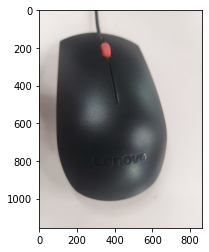

In [ ]:
plt.imshow(obj_img)

In [ ]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/without_obj'):
    img = imread(test_path+'/without_obj'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

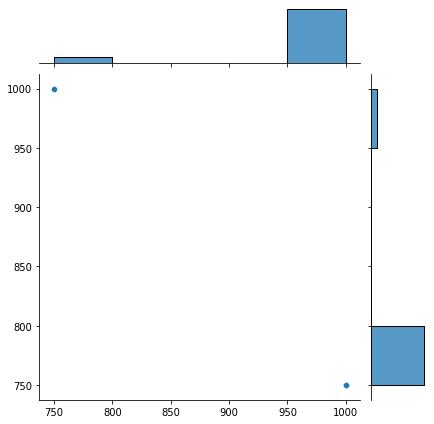

In [ ]:
sns.jointplot(x=dim1,y=dim2)

In [ ]:
image_shape = (130,130,3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
image_gen.flow_from_directory(train_path)

Found 80 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 20 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.compile(loss='binary_crossentropy',

              optimizer='adam',

              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
batch_size = 10

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 80 images belonging to 2 classes.


In [ ]:
train_image_gen.batch_size

10

In [ ]:
len(train_image_gen.classes)

80

In [ ]:
train_image_gen.total_batches_seen

0

In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 20 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'with_obj': 0, 'without_obj': 1}

In [ ]:
results = model.fit(train_image_gen,epochs=5,
                              validation_data=test_image_gen
                             )

Epoch 1/5
8/8 [==============================] - 52s 5s/step - loss: 0.7115 - accuracy: 0.5375 - val_loss: 0.6097 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 2s 242ms/step - loss: 0.5306 - accuracy: 0.8125 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 2s 244ms/step - loss: 0.1828 - accuracy: 0.9625 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 2s 247ms/step - loss: 0.0722 - accuracy: 0.9625 - val_loss: 0.0937 - val_accuracy: 0.9500
Epoch 5/5
8/8 [==============================] - 2s 238ms/step - loss: 0.1180 - accuracy: 0.9750 - val_loss: 0.0035 - val_accuracy: 1.0000


In [ ]:
model.save('cell_model.h5')


In [ ]:
losses = pd.DataFrame(model.history.history)

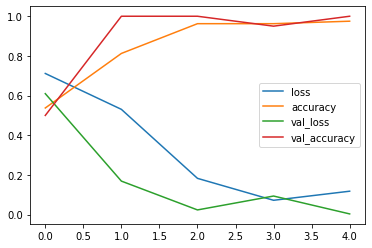

In [ ]:
losses.plot()

In [ ]:
model.evaluate(test_image_gen)

2/2 [==============================] - 0s 150ms/step - loss: 0.0036 - accuracy: 1.0000


[0.0035789492540061474, 1.0]

In [ ]:
pred_probabilities = model.predict(test_image_gen)

2/2 [==============================] - 0s 154ms/step


In [ ]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[10,  0],
       [ 0, 10]])

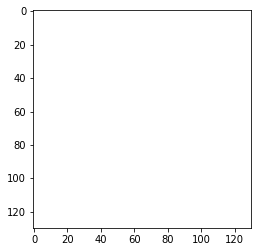

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('ob3.jpeg')
img=tf.convert_to_tensor(np.asarray(img))
img=tf.image.resize(img,(130,130))
img=img.numpy()
type(img)
plt.imshow(img)

In [ ]:
x_single_prediction = bool(model.predict(img.reshape(1,130,130,3))>0.6)
print(x_single_prediction)
if(x_single_prediction==1):
    print("Image has no Object")
else:
    print("Image has a Object")

1/1 [==============================] - 0s 16ms/step
True
Image has no Object
